<font size=7> Burst Attempt

# Setup

In [18]:
from human_hip import spike_data
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [19]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


## <font color="grey">code

In [20]:
import matplotlib.pyplot as plt
from braingeneers.analysis.analysis import SpikeData
from scipy.ndimage import gaussian_filter1d
import numpy as np


def plot_raster( sd, title="", opto=[], axs=None, xlim=None, ylim=None, smoothness=20, size=(16,6) ):
    pop_rate = sd.binned(bin_size=1)
    pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=smoothness)
    bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
    
    if axs is None:
        fig, axs = plt.subplots(1, 1, figsize=size )
    axs.set_title(title, fontsize=22)

    y = 0
    for vv in sd.train:
        axs.scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
        y += 1
    axs.set_xlabel("Time (s)", fontsize=16)
    axs.set_ylabel("Neural Unit", fontsize=16)
    axs.xaxis.set_tick_params(labelsize=16)
    axs.yaxis.set_tick_params(labelsize=16)
    for row in opto:
        axs.axvspan(row[0], row[1], color='#00FF00', alpha=0.15) 

    axs1 = axs.twinx()
    axs1.yaxis.set_label_position("right") 
    axs1.spines['right'].set_color('r')
    axs1.spines['right'].set_linewidth(3)
    axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
    axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
    axs1.set_xlabel("Time (ms)", fontsize=16)
    axs1.yaxis.set_tick_params(labelsize=16)
    axs1.set_xlim(xlim)
    axs1.set_ylim(ylim)
    #axs1.set_ylim(ylim)

    axs1.spines['top'].set_visible(False)
    axs1.get_xaxis().set_visible(False)
    axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                    bottom=False, labelbottom=True)
    axs1.tick_params(axis='y', colors='r')

    return axs, axs1

In [21]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')
    plt.show()


# Subtraction Plots

In [22]:
import braingeneers.data.datasets_electrophysiology as ephys
metadata = ephys.load_metadata("2023-12-03-e-Hc112823_avv9hckcr1")

In [23]:
metadata['ephys_experiments']['experiment9'].keys()

dict_keys(['blocks', 'hardware', 'name', 'notes', 'num_channels', 'sample_rate', 'scaler', 'timestamp', 'units', 'version', 'mapping', 'gain', 'high_pass_filter', 'least_significant_bit', 'sampling_rate'])

In [24]:
sd1 = sd.subtime( 14.4*1000 ,  14.57*1000 )
sd2 = sd.subtime( 14.57*1000 ,  14.75*1000 )
sd3 = sd.subtime(  14.75*1000, 14.91*1000 )

firings_1 = calculate_mean_firing_rates(sd1)
firings_2 = calculate_mean_firing_rates(sd2)
firings_3 = calculate_mean_firing_rates(sd3)

firings_diff_1 =  firings_2 - firings_1
firings_diff_2 =  firings_3 - firings_2

firings_diff_1
58 have no change in firing rate


Text(0.5, 1.0, 'Histogram')

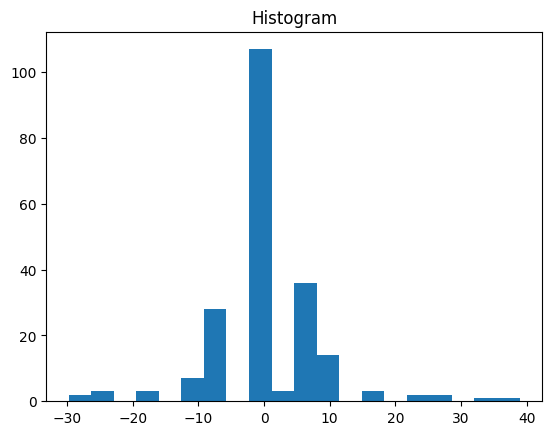

In [25]:
print("firings_diff_1")
print( sum(firings_diff_1==0), "have no change in firing rate")

plt.hist(firings_diff_1, bins=20)#, edgecolor='black')  # You can adjust the number of bins
plt.title('Histogram')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.show()

firings_diff_2
46 have no change in firing rate


Text(0.5, 1.0, 'Histogram')

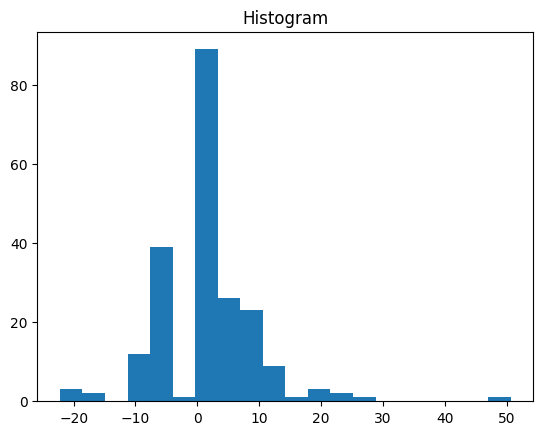

In [26]:
print("firings_diff_2")
print( sum(firings_diff_2==0), "have no change in firing rate")

plt.hist(firings_diff_2, bins=20)#, edgecolor='black')  # You can adjust the number of bins
plt.title('Histogram')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.show()

In [27]:
# neuron_x = []
# neuron_y = []
# for neuron in sd.neuron_data[0].values():
#     neuron_x.append(neuron['position'][0])
#     neuron_y.append(neuron['position'][1])

# norm = plt.Normalize( vmin= np.mean(firings_diff_2)-np.std(firings_diff_2), vmax= np.mean(firings_diff_2)+np.std(firings_diff_2) )
# cmap = LinearSegmentedColormap.from_list("my_cmap", ["darkorange", "white" , 'darkgreen' ])

# plt.figure(figsize=(8, 8))
# img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
# plt.imshow(img,  extent=[0, 3850, 0, 2100])
# plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.3)*50, alpha=0.4, c=firings_diff_2, edgecolor='none',
#             norm=norm, cmap=cmap )
# plt.xlim(0,1750)
# plt.ylim(0,1750)
# # plt.xlim(0,1750)
# # plt.ylim(700,1500)
# plt.show()

# Subtraction bursts - try 2

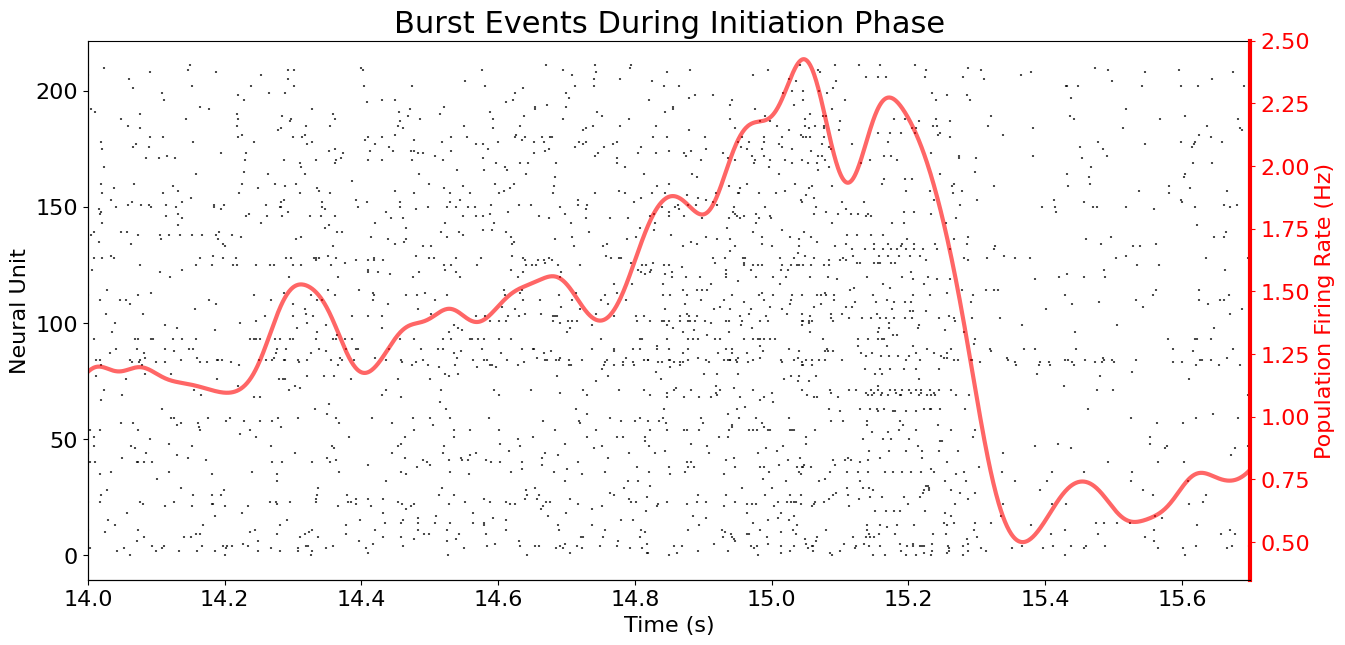

In [28]:
spike_data.plot_raster( sd, size=(15,7), xlim=(14, 15.7), smoothness=28, ylim=(0.35,2.5),
                         title="Burst Events During Initiation Phase" )
axs = plt.gca()
#axs.vlines( [14.4, 14.57, 14.75, 14.91], 0.35, 2.5, color='black' )

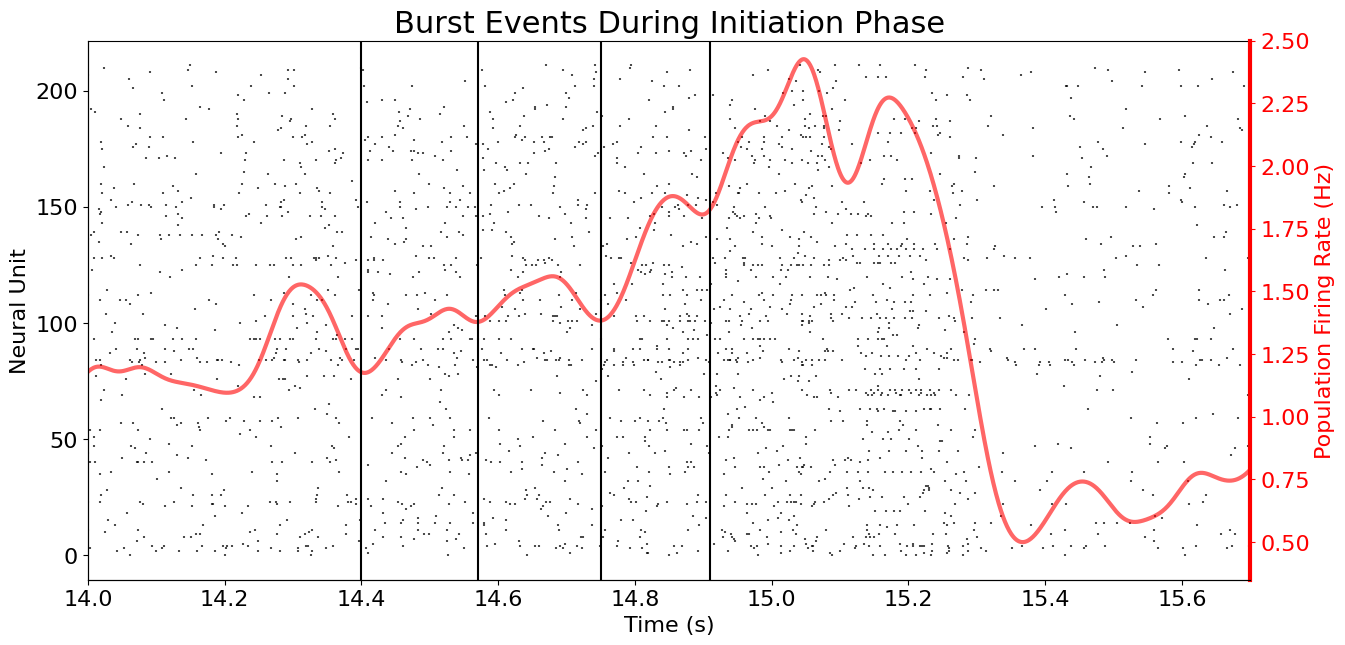

In [29]:
spike_data.plot_raster( sd, size=(15,7), xlim=(14, 15.7), smoothness=28, ylim=(0.35,2.5),
                         title="Burst Events During Initiation Phase" )
axs = plt.gca()
axs.vlines( [14.4, 14.57, 14.75, 14.91], 0.35, 2.5, color='black' )

In [30]:
sd1 = sd.subtime( 14.4*1000 ,  14.57*1000 )
sd2 = sd.subtime( 14.57*1000 ,  14.75*1000 )
sd3 = sd.subtime(  14.75*1000, 14.91*1000 )

firings_1 = calculate_mean_firing_rates(sd1)
firings_2 = calculate_mean_firing_rates(sd2)
firings_3 = calculate_mean_firing_rates(sd3)

firings_diff_1 =  firings_1-firings_2
firings_diff_2 =  firings_2-firings_3

/tmp/ipykernel_1385/2358878125.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


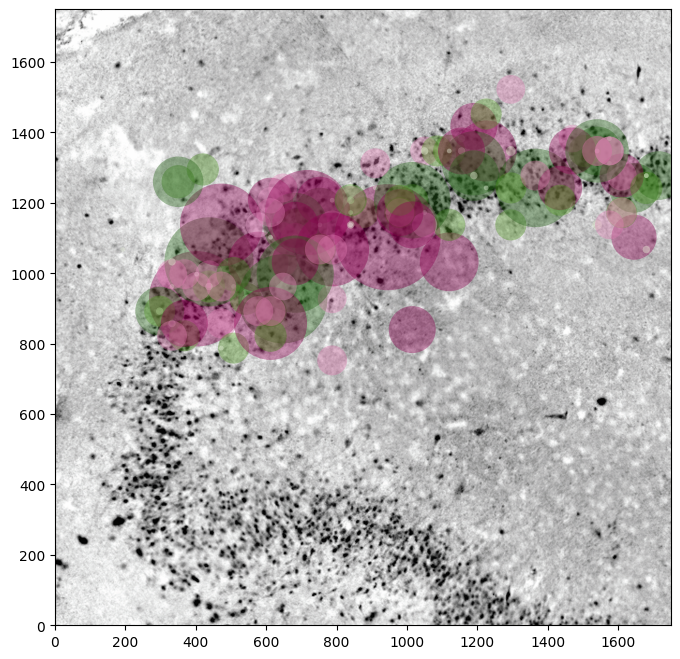

In [31]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff_1)-np.std(firings_diff_1), vmax= np.mean(firings_diff_1)+np.std(firings_diff_1) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.3)*50, alpha=0.4, c=firings_diff_1, edgecolor='none',
            norm=norm, cmap=cm.PiYG )
plt.xlim(0,1750)
plt.ylim(0,1750)
#plt.colorbar()
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()

/tmp/ipykernel_3946/1029280407.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


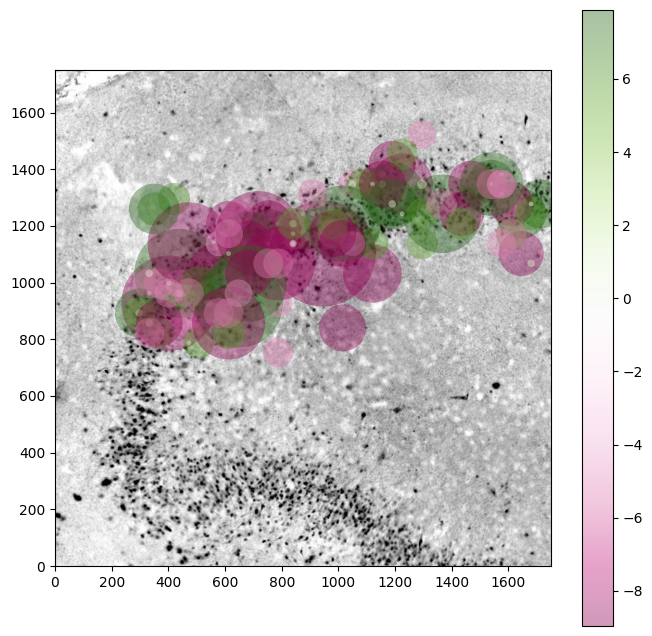

In [16]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff_1)-np.std(firings_diff_1), vmax= np.mean(firings_diff_1)+np.std(firings_diff_1) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.3)*50, alpha=0.4, c=firings_diff_1, edgecolor='none',
            norm=norm, cmap=cm.PiYG )
plt.xlim(0,1750)
plt.ylim(0,1750)
plt.colorbar()
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()

/tmp/ipykernel_3946/1595359798.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


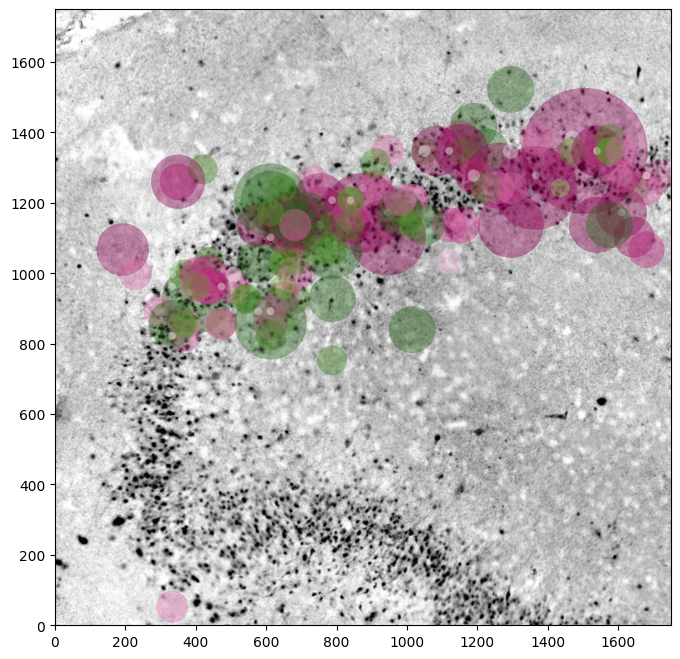

In [17]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff_2)-np.std(firings_diff_2), vmax= np.mean(firings_diff_2)+np.std(firings_diff_2) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.3)*50, alpha=0.4, c=firings_diff_2, edgecolor='none',
            norm=norm, cmap=cm.PiYG )
plt.xlim(0,1750)
plt.ylim(0,1750)
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()